# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

C:\Users\caipr\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Instructions for updating:
Use the retry module or similar alternatives.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/d

Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

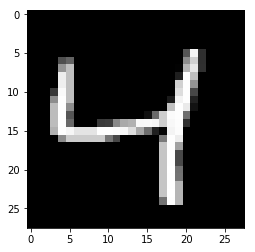

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [12]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

image_size = mnist.train.images.shape[1]
print(image_size)

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name='targets')

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name='output')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

784


## Training

In [8]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [9]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6934
Epoch: 1/20... Training loss: 0.6904
Epoch: 1/20... Training loss: 0.6874
Epoch: 1/20... Training loss: 0.6836
Epoch: 1/20... Training loss: 0.6793
Epoch: 1/20... Training loss: 0.6734
Epoch: 1/20... Training loss: 0.6666
Epoch: 1/20... Training loss: 0.6589
Epoch: 1/20... Training loss: 0.6501
Epoch: 1/20... Training loss: 0.6408
Epoch: 1/20... Training loss: 0.6274
Epoch: 1/20... Training loss: 0.6162
Epoch: 1/20... Training loss: 0.6037
Epoch: 1/20... Training loss: 0.5882
Epoch: 1/20... Training loss: 0.5715
Epoch: 1/20... Training loss: 0.5552
Epoch: 1/20... Training loss: 0.5377
Epoch: 1/20... Training loss: 0.5224
Epoch: 1/20... Training loss: 0.5040
Epoch: 1/20... Training loss: 0.4844
Epoch: 1/20... Training loss: 0.4668
Epoch: 1/20... Training loss: 0.4557
Epoch: 1/20... Training loss: 0.4339
Epoch: 1/20... Training loss: 0.4167
Epoch: 1/20... Training loss: 0.4012
Epoch: 1/20... Training loss: 0.3960
Epoch: 1/20... Training loss: 0.3766
E

Epoch: 2/20... Training loss: 0.1784
Epoch: 2/20... Training loss: 0.1844
Epoch: 2/20... Training loss: 0.1841
Epoch: 2/20... Training loss: 0.1822
Epoch: 2/20... Training loss: 0.1823
Epoch: 2/20... Training loss: 0.1801
Epoch: 2/20... Training loss: 0.1856
Epoch: 2/20... Training loss: 0.1806
Epoch: 2/20... Training loss: 0.1781
Epoch: 2/20... Training loss: 0.1769
Epoch: 2/20... Training loss: 0.1817
Epoch: 2/20... Training loss: 0.1829
Epoch: 2/20... Training loss: 0.1810
Epoch: 2/20... Training loss: 0.1838
Epoch: 2/20... Training loss: 0.1782
Epoch: 2/20... Training loss: 0.1851
Epoch: 2/20... Training loss: 0.1792
Epoch: 2/20... Training loss: 0.1761
Epoch: 2/20... Training loss: 0.1831
Epoch: 2/20... Training loss: 0.1783
Epoch: 2/20... Training loss: 0.1817
Epoch: 2/20... Training loss: 0.1817
Epoch: 2/20... Training loss: 0.1786
Epoch: 2/20... Training loss: 0.1747
Epoch: 2/20... Training loss: 0.1783
Epoch: 2/20... Training loss: 0.1752
Epoch: 2/20... Training loss: 0.1774
E

Epoch: 3/20... Training loss: 0.1444
Epoch: 3/20... Training loss: 0.1484
Epoch: 3/20... Training loss: 0.1444
Epoch: 3/20... Training loss: 0.1406
Epoch: 3/20... Training loss: 0.1412
Epoch: 3/20... Training loss: 0.1400
Epoch: 3/20... Training loss: 0.1459
Epoch: 3/20... Training loss: 0.1469
Epoch: 3/20... Training loss: 0.1423
Epoch: 3/20... Training loss: 0.1496
Epoch: 3/20... Training loss: 0.1465
Epoch: 3/20... Training loss: 0.1427
Epoch: 3/20... Training loss: 0.1468
Epoch: 3/20... Training loss: 0.1468
Epoch: 3/20... Training loss: 0.1449
Epoch: 3/20... Training loss: 0.1398
Epoch: 3/20... Training loss: 0.1437
Epoch: 3/20... Training loss: 0.1444
Epoch: 3/20... Training loss: 0.1460
Epoch: 3/20... Training loss: 0.1490
Epoch: 3/20... Training loss: 0.1452
Epoch: 3/20... Training loss: 0.1389
Epoch: 3/20... Training loss: 0.1417
Epoch: 3/20... Training loss: 0.1478
Epoch: 3/20... Training loss: 0.1459
Epoch: 3/20... Training loss: 0.1445
Epoch: 3/20... Training loss: 0.1495
E

Epoch: 3/20... Training loss: 0.1269
Epoch: 3/20... Training loss: 0.1250
Epoch: 3/20... Training loss: 0.1252
Epoch: 3/20... Training loss: 0.1263
Epoch: 3/20... Training loss: 0.1231
Epoch: 3/20... Training loss: 0.1247
Epoch: 3/20... Training loss: 0.1243
Epoch: 3/20... Training loss: 0.1221
Epoch: 3/20... Training loss: 0.1307
Epoch: 3/20... Training loss: 0.1234
Epoch: 4/20... Training loss: 0.1249
Epoch: 4/20... Training loss: 0.1296
Epoch: 4/20... Training loss: 0.1268
Epoch: 4/20... Training loss: 0.1281
Epoch: 4/20... Training loss: 0.1242
Epoch: 4/20... Training loss: 0.1229
Epoch: 4/20... Training loss: 0.1265
Epoch: 4/20... Training loss: 0.1344
Epoch: 4/20... Training loss: 0.1273
Epoch: 4/20... Training loss: 0.1330
Epoch: 4/20... Training loss: 0.1248
Epoch: 4/20... Training loss: 0.1260
Epoch: 4/20... Training loss: 0.1257
Epoch: 4/20... Training loss: 0.1237
Epoch: 4/20... Training loss: 0.1244
Epoch: 4/20... Training loss: 0.1276
Epoch: 4/20... Training loss: 0.1275
E

Epoch: 4/20... Training loss: 0.1194
Epoch: 4/20... Training loss: 0.1202
Epoch: 4/20... Training loss: 0.1148
Epoch: 4/20... Training loss: 0.1149
Epoch: 4/20... Training loss: 0.1170
Epoch: 4/20... Training loss: 0.1143
Epoch: 4/20... Training loss: 0.1211
Epoch: 4/20... Training loss: 0.1170
Epoch: 4/20... Training loss: 0.1187
Epoch: 4/20... Training loss: 0.1151
Epoch: 4/20... Training loss: 0.1113
Epoch: 4/20... Training loss: 0.1191
Epoch: 4/20... Training loss: 0.1145
Epoch: 4/20... Training loss: 0.1167
Epoch: 4/20... Training loss: 0.1187
Epoch: 4/20... Training loss: 0.1159
Epoch: 4/20... Training loss: 0.1177
Epoch: 4/20... Training loss: 0.1194
Epoch: 4/20... Training loss: 0.1183
Epoch: 4/20... Training loss: 0.1130
Epoch: 4/20... Training loss: 0.1150
Epoch: 4/20... Training loss: 0.1178
Epoch: 4/20... Training loss: 0.1137
Epoch: 4/20... Training loss: 0.1149
Epoch: 4/20... Training loss: 0.1151
Epoch: 4/20... Training loss: 0.1210
Epoch: 4/20... Training loss: 0.1188
E

Epoch: 5/20... Training loss: 0.1094
Epoch: 5/20... Training loss: 0.1135
Epoch: 5/20... Training loss: 0.1112
Epoch: 5/20... Training loss: 0.1073
Epoch: 5/20... Training loss: 0.1049
Epoch: 5/20... Training loss: 0.1091
Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1061
Epoch: 5/20... Training loss: 0.1103
Epoch: 5/20... Training loss: 0.1112
Epoch: 5/20... Training loss: 0.1102
Epoch: 5/20... Training loss: 0.1157
Epoch: 5/20... Training loss: 0.1072
Epoch: 5/20... Training loss: 0.1082
Epoch: 5/20... Training loss: 0.1090
Epoch: 5/20... Training loss: 0.1137
Epoch: 5/20... Training loss: 0.1134
Epoch: 5/20... Training loss: 0.1089
Epoch: 5/20... Training loss: 0.1082
Epoch: 5/20... Training loss: 0.1126
Epoch: 5/20... Training loss: 0.1067
Epoch: 5/20... Training loss: 0.1116
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1104
Epoch: 5/20... Training loss: 0.1103
Epoch: 5/20... Training loss: 0.1079
Epoch: 5/20... Training loss: 0.1102
E

Epoch: 6/20... Training loss: 0.1081
Epoch: 6/20... Training loss: 0.1013
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1032
Epoch: 6/20... Training loss: 0.1072
Epoch: 6/20... Training loss: 0.1063
Epoch: 6/20... Training loss: 0.1065
Epoch: 6/20... Training loss: 0.1032
Epoch: 6/20... Training loss: 0.1003
Epoch: 6/20... Training loss: 0.1058
Epoch: 6/20... Training loss: 0.1070
Epoch: 6/20... Training loss: 0.1011
Epoch: 6/20... Training loss: 0.1059
Epoch: 6/20... Training loss: 0.1082
Epoch: 6/20... Training loss: 0.1065
Epoch: 6/20... Training loss: 0.1079
Epoch: 6/20... Training loss: 0.1097
Epoch: 6/20... Training loss: 0.1016
Epoch: 6/20... Training loss: 0.1002
Epoch: 6/20... Training loss: 0.1032
Epoch: 6/20... Training loss: 0.1067
Epoch: 6/20... Training loss: 0.1059
Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1071
Epoch: 6/20... Training loss: 0.1038
E

Epoch: 7/20... Training loss: 0.1032
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1077
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.1044
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.1088
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.1042
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.0942
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1056
Epoch: 7/20... Training loss: 0.1036
Epoch: 7/20... Training loss: 0.1022
E

Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0942
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.1003
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.1012
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.0948
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.1009
Epoch: 8/20... Training loss: 0.1010
Epoch: 8/20... Training loss: 0.1012
Epoch: 8/20... Training loss: 0.0943
Epoch: 8/20... Training loss: 0.1021
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.1015
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.1003
Epoch: 8/20... Training loss: 0.1022
E

Epoch: 9/20... Training loss: 0.0934
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0986
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0932
Epoch: 9/20... Training loss: 0.0989
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0932
Epoch: 9/20... Training loss: 0.0931
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0986
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0990
Epoch: 9/20... Training loss: 0.0962
E

Epoch: 10/20... Training loss: 0.0993
Epoch: 10/20... Training loss: 0.0934
Epoch: 10/20... Training loss: 0.0981
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0982
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0912
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.1002
Epoch: 10/20... Training loss: 0.0988
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0982
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0914
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0975
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0982
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0973
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0971
Epoch: 11/20... Training loss: 0.0913
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0912
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0984
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0992
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0970
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0915
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20... Training loss: 0.0972
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0922
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0967
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0919
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0970
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0978
Epoch: 12/20... Training loss: 0.0977
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0923
Epoch: 12/20

Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0965
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0987
Epoch: 12/20... Training loss: 0.0913
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0976
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0978
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0919
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0909
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0912
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0919
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0916
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0961
Epoch: 13/20... Training loss: 0.0892
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0920
Epoch: 13/20... Training loss: 0.0988
Epoch: 13/20... Training loss: 0.0962
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0900
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0895
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0914
Epoch: 13/20... Training loss: 0.0973
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0916
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0963
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0913
Epoch: 14/20... Training loss: 0.0919
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0918
Epoch: 14/20... Training loss: 0.0915
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0908
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0979
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20... Training loss: 0.0960
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0967
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0975
Epoch: 15/20... Training loss: 0.0902
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0915
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0907
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0980
Epoch: 15/20... Training loss: 0.0984
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0978
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0970
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0909
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0914
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0916
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0895
Epoch: 16/20... Training loss: 0.0904
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0971
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0896
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0958
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0971
Epoch: 17/20... Training loss: 0.0959
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0980
Epoch: 17/20... Training loss: 0.0916
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0915
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0875
Epoch: 17/20... Training loss: 0.0976
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0974
Epoch: 17/20... Training loss: 0.0960
Epoch: 17/20... Training loss: 0.0954
Epoch: 17/20... Training loss: 0.0965
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0969
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0961
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0898
Epoch: 18/20... Training loss: 0.0971
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0979
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20... Training loss: 0.0961
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0972
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0986
Epoch: 19/20... Training loss: 0.0963
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0975
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20... Training loss: 0.0909
Epoch: 19/20... Training loss: 0.0963
Epoch: 19/20... Training loss: 0.0910
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0904
Epoch: 19/20... Training loss: 0.0906
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0908
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0964
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0961
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20... Training loss: 0.0961
Epoch: 20/20... Training loss: 0.0974
Epoch: 20/20... Training loss: 0.0904
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0980
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0896
Epoch: 20/20... Training loss: 0.0970
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0950
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

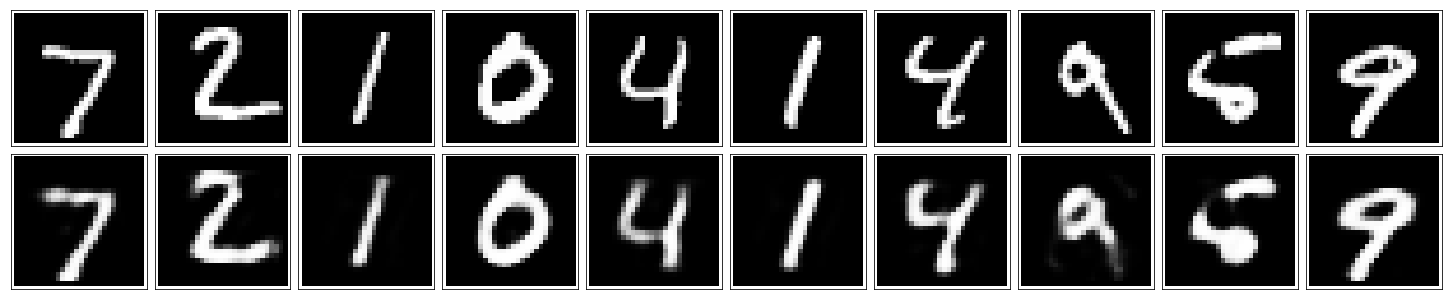

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [11]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.